In [301]:
import backend.algorithms as algo
import backend.data_gen as data_gen
import numpy as np
import matplotlib.pyplot as plt

In [308]:
sites_dict = ['111','112','113','121','122','123','131','132','133','211','212','213','221','222','223','231','232','233','311','312','313','321','322','323','331','332','333']

In [309]:
def check_correct_return(all_sites):
    current_best_site = None
    for site in all_sites.values():
        if (current_best_site.p < site.p):
            current_best_site = site
    
def calc_simpel_regret(best_sites,all_sites):
    p_max = max(site.p for site in all_sites)
    totalregret = 0
    for site in best_sites:
        totalregret+=(p_max - site.p)
    return totalregret

In [310]:
def run_website_analysis(number_of_website, budget):
    remaining_sites = []
    data = []
    for idx in range(100):
        website_data = list(data_gen.generate_data(budget,sites_dict[:number_of_website],0.01,0.1,0.1).values())
        remaining_sites.append(algo.succesive_elimination(website_data,budget,0.95))
        data.append(website_data)

    remaining_sites_length = []
    simpel_regret = []
    simpel_regret_best_only = []
    for idx, rem in enumerate(remaining_sites):
        remaining_sites_length.append(len(rem))
        simpel_regret.append(calc_simpel_regret(rem,data[idx]))
        simpel_regret_best_only.append(calc_simpel_regret([rem[0]],data[idx]))

    return simpel_regret,simpel_regret_best_only,remaining_sites_length

In [188]:
simpel_regret,simpel_regret_best,remaining_sites = run_website_analysis(2,100000)

In [99]:
simpel_regret_5_10000,simpel_regret_best_only_5_10000,remaining_sites_length_5_10000 = run_website_analysis(5,10000)
simpel_regret_5_20000,simpel_regret_best_only_5_20000,remaining_sites_length_5_20000 = run_website_analysis(5,20000)
simpel_regret_5_40000,simpel_regret_best_only_5_40000,remaining_sites_length_5_40000 = run_website_analysis(5,40000)
simpel_regret_5_80000,simpel_regret_best_only_5_80000,remaining_sites_length_5_80000 = run_website_analysis(5,80000)
simpel_regret_5_160000,simpel_regret_best_only_5_160000,remaining_sites_length_5_160000 = run_website_analysis(5,160000)

Text(0, 0.5, 'Number of website groups')

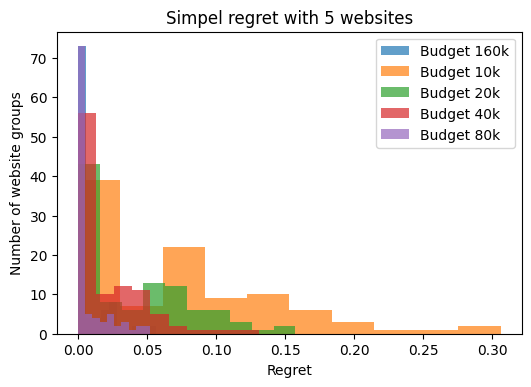

In [313]:
plt.figure(dpi=100)
plt.hist(simpel_regret_5_160000,label = 'Budget 160k',alpha = 0.7)
plt.hist(simpel_regret_5_10000,label = 'Budget 10k',alpha = 0.7)
plt.hist(simpel_regret_5_20000,label = 'Budget 20k',alpha = 0.7)
plt.hist(simpel_regret_5_40000,label = 'Budget 40k',alpha = 0.7)
plt.hist(simpel_regret_5_80000,label = 'Budget 80k',alpha = 0.7)

plt.legend()
plt.title('Simpel regret with 5 websites')
plt.xlabel('Regret')
plt.ylabel('Number of website groups')

In [255]:
import multiprocessing

In [260]:
number_of_sites = [2,5,10,20]
budgets = [10000,20000,40000,80000,160000]

In [272]:
import multiprocessing

In [274]:
multiprocessing.Manager().dict()
for budget in budgets:
    for num in number_of_sites:
        p = multiprocessing.Process(target=run_website_analysis,args=[budget,num])
        print(1)


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


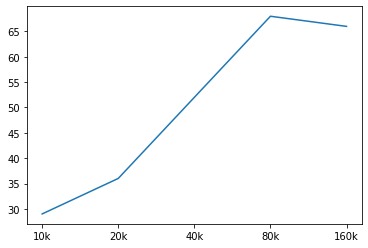

In [257]:
import plotly.graph_objects as go
a = [simpel_regret_5_10000.count(0),simpel_regret_5_20000.count(0),simpel_regret_5_40000.count(0),simpel_regret_5_80000.count(0),simpel_regret_5_160000.count(0)]
x = [0,1,2,3,4]
xi = ['10k','20k','40k','80k','160k']
plt.plot(a);
plt.xticks(x,xi);

In [233]:
simpel_regrets = [simpel_regret_5_10000,simpel_regret_5_20000,simpel_regret_5_40000,simpel_regret_5_80000]

In [234]:
for regrets in simpel_regrets:
    print(regrets.count(0))

29
36
52
68


Text(0, 0.5, 'Number of website groups')

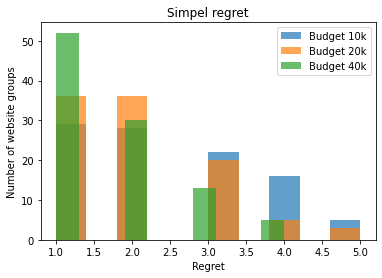

In [124]:
plt.hist(remaining_sites_length_5_10000,label = 'Budget 10k',alpha = 0.7)
plt.hist(remaining_sites_length_5_20000,label = 'Budget 20k',alpha = 0.7)
plt.hist(remaining_sites_length_5_40000,label = 'Budget 40k',alpha = 0.7)
plt.legend()
plt.title('Simpel regret')
plt.xlabel('Regret')
plt.ylabel('Number of website groups')